<div align="center">

# **Machine Learning - Lidando com dados de muitas dimensões**

<img src="https://sigmoidal.ai/wp-content/uploads/2022/05/neural_nets.png" width="600" height="350">

</div>

Neste curso será desenvolvido um projeto da **Alura Care**, uma startup fictícia que tem por objetivo reduzir o número de exames necessários para o diagnóstico de um tipo específico de câncer.

Para isso, iniciaremos um pré-processamento dos dados, aprendendo a identificar, por exemplo, células vazias, e como lidar com esse tipo de problema. Também identificaremos valores constantes nos dados e como eles podem impactar ou não no processo de classificação, além de como a correlação influe neste mesmo processo.

Feito isso, iniciaremos os métodos de seleção de features automáticos, como o *SelectKBest* e o *RFE*. Além disso, conseguiremos determinar qual o conjunto que nos gerará o melhor resultado possível no processo de classificação, quantas features precisaremos e quais são essas features.

Por último, aprenderemos como visualizar em um plano um dado de alta dimensionalidade, reduzindo a dimensão mas mantendo o maior número possível de informações.

Os dados que iremos trabalhar neste curso está disponível neste [link](https://github.com/alura-cursos/reducao-dimensionalidade/blob/master/data-set/exames.csv).

# Primeiros passos

## Importando os dados

In [78]:
uri = 'https://raw.githubusercontent.com/alura-cursos/reducao-dimensionalidade/master/data-set/exames.csv'

In [79]:
import pandas as pd

resultados_exames = pd.read_csv(uri)

In [80]:
resultados_exames.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


## Dividindo dados de treino e teste

In [81]:
from sklearn.model_selection import train_test_split
from numpy import random

SEED = 123143
random.seed(SEED)

x = resultados_exames.drop(columns=['id', 'diagnostico'])
y = resultados_exames['diagnostico']

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y)

## Criando o modelo

O modelo que iremos usar é o [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classificador = RandomForestClassifier(n_estimators=100)
classificador.fit(treino_x, treino_y)
classificador.score(teste_x, teste_y)  # Calcula a previsão junto com a acurácia

Deu erro por termos valores vazios na nossa base de dados. Precisamos tratar esses valores.

## Tratando valores vazios

In [83]:
resultados_exames.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

Temos 419 amostras vazias do exame 33.

In [84]:
resultados_exames.shape

(569, 35)

In [85]:
419/569

0.7363796133567663

Considerando que temos um total de 569 amostras, então temos 73% de amostras vazias. Portanto, para este caso, a melhor solução é excluir a coluna e é isso que iremos fazer.

In [86]:
exames_sem_null = resultados_exames.drop(columns='exame_33')

In [87]:
exames_sem_null.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678


## Aplicando o modelo

Pronto, agora já podemos rodar o nosso modelo sem erros. Vamos copiar todo o nosso algoritmo anterior e refatora-lo.

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from numpy import random

SEED = 123143
random.seed(SEED)

x = exames_sem_null.drop(columns=['id', 'diagnostico'])
y = exames_sem_null['diagnostico']

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.3)

classificador = RandomForestClassifier(n_estimators=100)
classificador.fit(treino_x, treino_y)
classificador.score(teste_x, teste_y)  # Calcula a previsão e já retorna a acurácia

0.9239766081871345

Obtivemos 92% de acurácia.

## Validando o modelo

Para validar o modelo, isto é, verificar se o resultado que obtivemos foi bom ou não, vamos utilizar o [DummyClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html).

In [89]:
from sklearn.dummy import DummyClassifier

classificador_bobo = DummyClassifier(strategy='most_frequent')
classificador_bobo.fit(treino_x, treino_y)
classificador_bobo.score(teste_x, teste_y)

0.6666666666666666

Obtivemos uma porcetagem de acertos bem mais baixa, 67%. Ou seja, o nosso modelo anterior se mostrou eficaz, pois teve um percentual de acertos bem mais alto de 92%.

# Avançando na exploração dos dados

In [90]:
exames_sem_null.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678


## Vizualização dos dados

Primeiramente, vamos organizar os dados para a plotagem, incluindo apenas as colunas que nos interessam.

In [91]:
dados_plot = pd.concat([y, x], axis=1)
dados_plot.head()

,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678


In [92]:
dados_plot = pd.melt(dados_plot, id_vars='diagnostico', var_name='exames', value_name='valores')
dados_plot.head()

,diagnostico,exames,valores
0,M,exame_1,17.99
1,M,exame_1,20.57
2,M,exame_1,19.69
3,M,exame_1,11.42
4,M,exame_1,20.29


Pronto, que os dados estão no formato que queremos, podemos plotar um gráfico utilizando o [seaborn](https://seaborn.pydata.org/) e o [matplolib](https://matplotlib.org/).

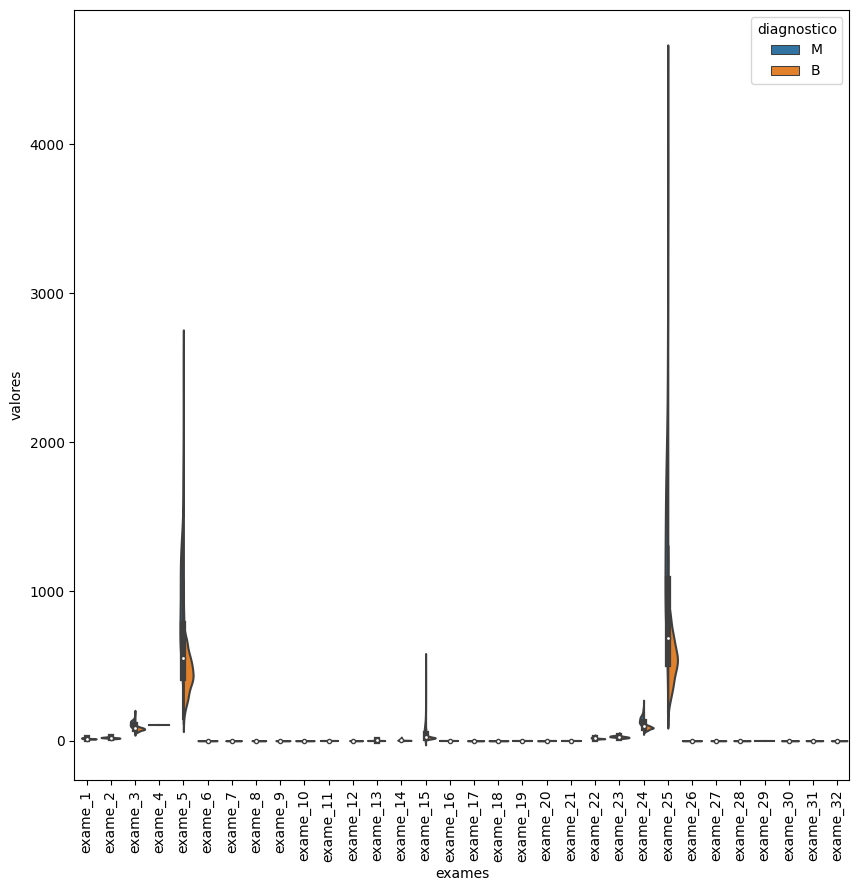

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.violinplot(x = "exames", y = "valores", hue = "diagnostico", data = dados_plot, split=True);
plt.xticks(rotation = 90);

Ficou ruim de vizualizar esses dados, né? São muitas informações, vamos tentar diminuir a quantidade de exames para vê se fica melhor. Para isso, vamos recopiar o código e refatora-lo para pegar apenas os 10 primeiros exames.

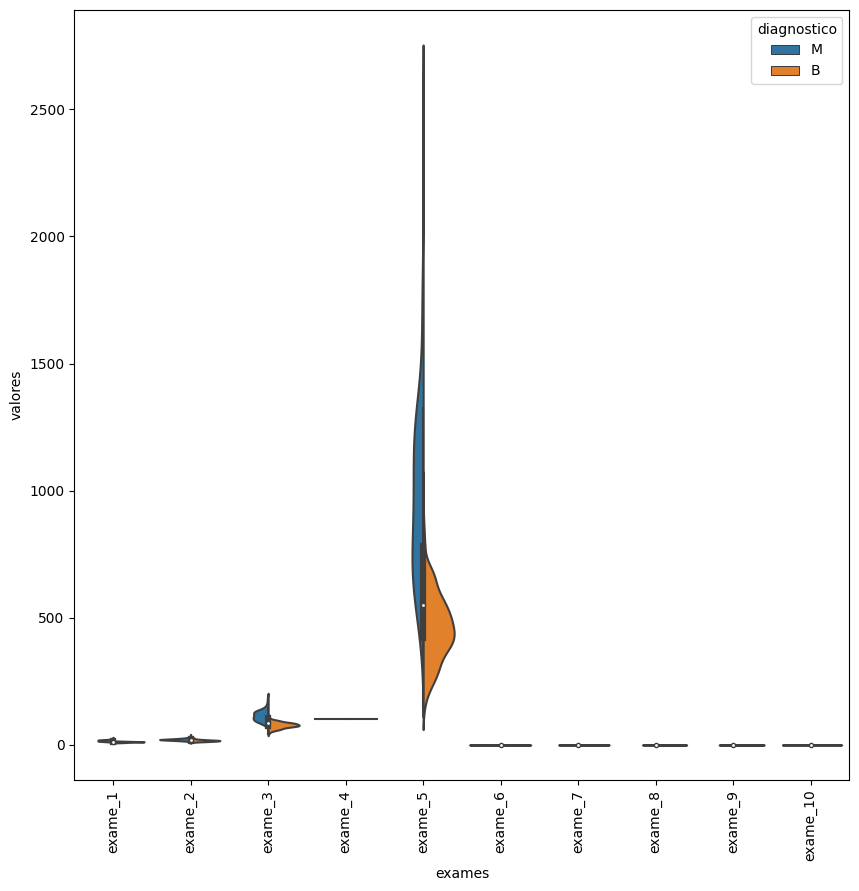

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

dados_plot = pd.concat([y, x.iloc[:,:10]], axis=1)  # Selecionando apenas os 10 primeiros exames
dados_plot = pd.melt(dados_plot, id_vars='diagnostico', var_name='exames', value_name='valores')

plt.figure(figsize=(10,10))
sns.violinplot(x = "exames", y = "valores", hue = "diagnostico", data = dados_plot, split=True);
plt.xticks(rotation = 90);

A vizualização ficou melhor, mas ainda tem algo estranho. Observe que a escala do eixo y está com valores exorbitantes, que dificultam nossa análise, será se podemos melhorar isso?

## Padronizando os dados

Para a padronizar os dados do eixo y, iremos utilizar o [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [95]:
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
padronizador.fit(x)
exames_padronizados = padronizador.transform(x)
exames_padronizados

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

Agora precisamos transmorma-lo novamente em um dataframe.

In [96]:
exames_padronizados = pd.DataFrame(data = exames_padronizados, columns = x.keys())

Para ficar mais claro as informações a quais estamos trabalhando, também renomearemos a variável y.

In [97]:
diagnostico = y

## Analisando o gráfico

Pronto, agora podemos voltar ao nosso algoritmo para plotagem e refatora-lo com algumas melhorias.

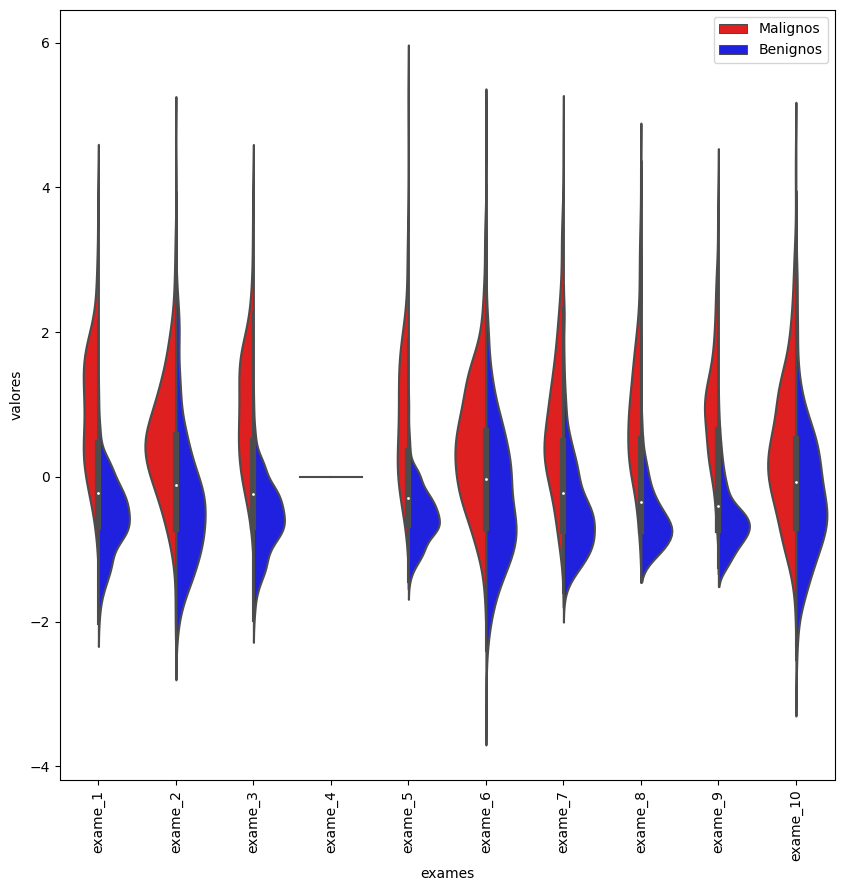

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

dados_plot = pd.concat([diagnostico, exames_padronizados.iloc[:,:10]], axis=1) # Selecionando apenas os 10 primeiros exames
dados_plot = pd.melt(dados_plot, id_vars='diagnostico', var_name='exames', value_name='valores')

plt.figure(figsize=(10,10))
cores = {"M": "red", "B": "blue"}  # Definindo a paleta de cores
sns.violinplot(x="exames", y="valores", hue="diagnostico", data=dados_plot, split=True, palette=cores)
plt.xticks(rotation=90)

# Personalizando a legenda das cores
legenda = plt.legend()
legenda.texts[0].set_text("Malignos")
legenda.texts[1].set_text("Benignos")

plt.show()

Temos uma vizualização melhor agora. Porém, ainda podemos notar uma anomalia no exame 4, não foi gerado gráfico para ele, veremos a causa disso depois.

Mas enfim, como podemos interpretar esse gráfico?

- No eixo x, temos os exames. No eixo y, temos os valores dos exames normalizados.
- No lado esquerdo de cada desenho, de vermelho, temos os tumores do tipo maligno, e do lado direito, de azul, os do tipo benigno. A parte mais alta das curvas, na horinzontal, são os valores que mais ocorrem para cada tipo.

Pegando como exemplo o **exame 2**, vemos que a crista da onda vermelha está mais distante da crista da onda azul, ou seja, esse pode ser considerado um bom exame para diferenciar tumores malignos e benignos.

Já o **exame 6**, não possue uma crista bem definida na onda azul e além disso os valores estão bem próximos da crista da onda vermelha. Portanto, o exame 6 não pode ser considerado um bom exame para diferenciar tumores benignos e malignos.


Voltando ao exame 4, vemos que o gráfico gerado para ele foi apenas uma reta. O que isso significa?

Para entender melhor, vamos olhar os valores do exame 4.

In [99]:
exames_sem_null.exame_4

0      103.78
1      103.78
2      103.78
3      103.78
4      103.78
        ...  
564    103.78
565    103.78
566    103.78
567    103.78
568    103.78
Name: exame_4, Length: 569, dtype: float64

Podemos perceber que os valores do exame 4 são todos iguais, o que chamamos de valores constantes.

## Valores constantes

Quando temos todos os valores constante em uma mesma coluna da base de dados, podemos elimina-la, pois sua contribuição para análise de Machine Learning é inútil, por não acrescentar nenhuma informação nova.

Antes fazermos isso, precisamos plotar todas as colunas de exames para sabermos quais deverão ser excluídas. Para facilitarmos nosso trabalho, criaremos uma função baseada no código que escrevemos.

In [100]:
def grafico_violino(exames, inicio, fim):
    dados_plot = pd.concat([diagnostico, exames.iloc[:,inicio:fim]], axis = 1)
    dados_plot = pd.melt(dados_plot, id_vars="diagnostico",
                         var_name="exames",
                         value_name="valores")

    plt.figure(figsize=(10,10))
    cores = {"M": "red", "B": "blue"}
    sns.violinplot(x="exames", y="valores", hue="diagnostico", data=dados_plot, split=True, palette=cores)
    plt.xticks(rotation = 90)

Para testarmos nossa função, acionaremos ela com os exames 11 ao 21.

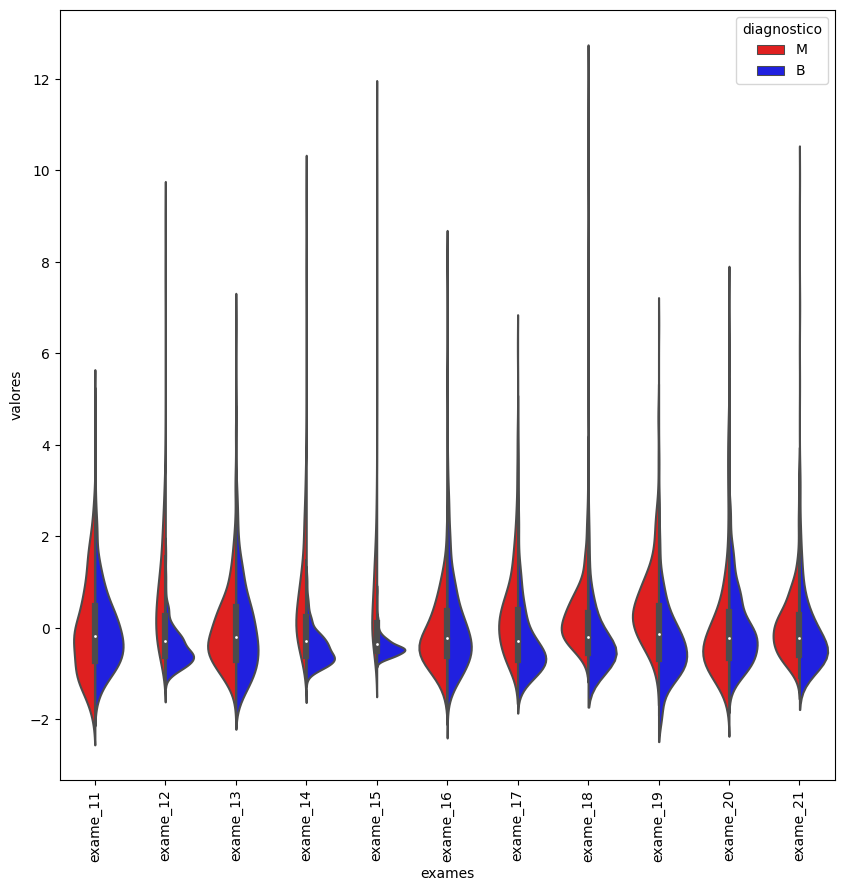

In [101]:
grafico_violino(exames_padronizados, 10, 21)

Agora com os exames 22 ao 32.

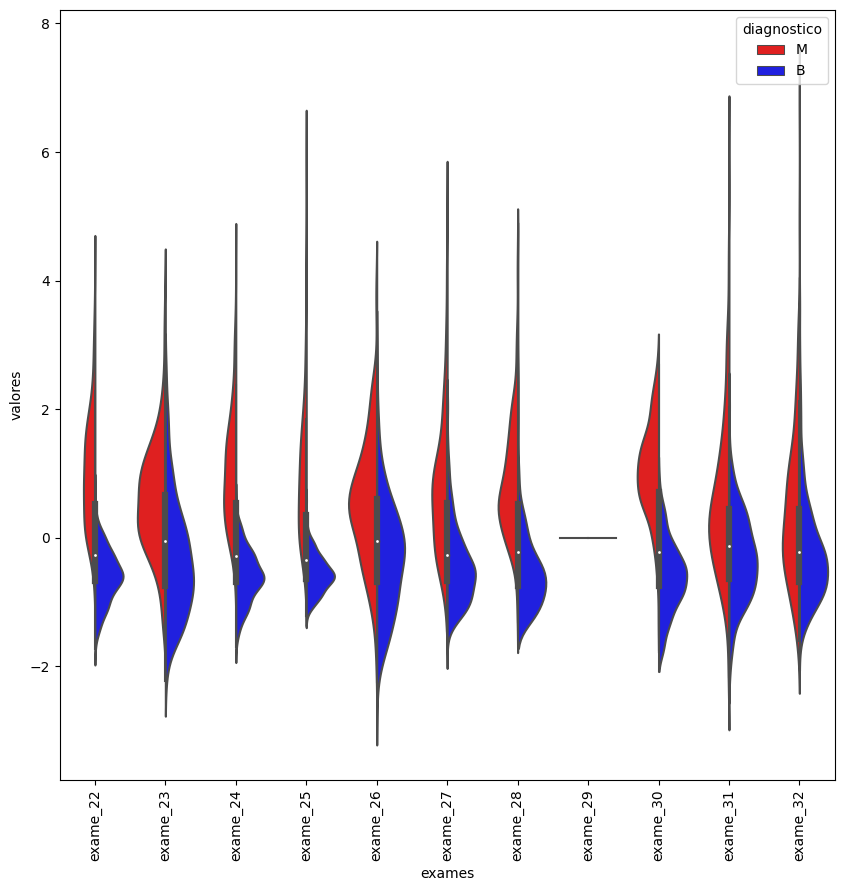

In [102]:
grafico_violino(exames_padronizados, 21, 32)

Nessa última plotagem, encontramos mais uma variável constante, que é a "exame_29". Também podemos notar outros fatores interessantes, como a curva acentuada para diagnósticos benignos do "exame_15", que mantém, em contrapartida, uma quantidade bem distribuída de diagnósticos malignos.

Nosso próximo passo será remover as variáveis constantes do conjunto e verificar se isso influenciou positivamente ou negativamente os nossos resultados. Sendo assim, criaremos um outras variável para salvar esses conjuntos de exames que não possuem valores constantes.

In [103]:
exames_variaveis = exames_padronizados.drop(columns=["exame_29","exame_4"])

Criaremos também uma nova função, chamada `classificar()`. Essa função irá criar novamente o modelo de classificação, treina-lo com a base de dados tratada e em seguida já testar a sua acurácia.

In [104]:
def classificar(valores):
    SEED = 123143
    random.seed(SEED)

    treino_x, teste_x, treino_y, teste_y = train_test_split(valores, diagnostico)

    classificador = RandomForestClassifier(n_estimators = 100)
    classificador.fit(treino_x, treino_y)
    print(f"Acurácia da classificação: {classificador.score(teste_x, teste_y)*100:.2f}%.")

Pronto, agora podemos testar a eficiência do classificador com a nossa nova base de dados.

In [105]:
classificar(exames_variaveis)

Acurácia da classificação: 93.01%.


Obtivemos uma precisão de acerto de 93% no nosso novo modelo com os dados tratados. Um aumento de 1% em relação ao modelo anterior, que obteve 92%. O que parece ser um amento insignificante, mas toda melhora é válida.

# Dados correlacionados

## Matriz de Correlação

O próximo objetivo é analisarmos a correlação entre os dados em nosso dataframe. Para isso, podemos utilizar uma **Matriz de Correlação**.

Uma matriz de correlação é uma tabela numérica que exibe as relações estatísticas entre diversas variáveis. Ela é frequentemente usada para avaliar a força e a direção das associações entre pares de variáveis. A matriz de correlação é especialmente útil em análises estatísticas e na exploração de dados para identificar padrões e entender como as variáveis se comportam em relação umas às outras.

Em uma matriz de correlação, cada célula representa o coeficiente de correlação entre duas variáveis. O coeficiente de correlação é um número que varia de -1 a 1, indicando a intensidade e a direção da relação entre as variáveis:

- Um coeficiente de correlação positivo próximo a 1 indica uma forte relação positiva entre as variáveis, o que significa que quando uma variável aumenta, a outra tende a aumentar também.

- Um coeficiente de correlação negativo próximo a -1 indica uma forte relação negativa entre as variáveis, o que significa que quando uma variável aumenta, a outra tende a diminuir.

- Um coeficiente de correlação próximo a 0 indica uma relação fraca ou nula entre as variáveis, ou seja, as mudanças em uma variável não têm um padrão consistente de influência sobre a outra.

A matriz de correlação é frequentemente visualizada como um gráfico de calor (heatmap), em que as células são coloridas de acordo com o valor do coeficiente de correlação. Isso ajuda a identificar rapidamente as relações mais fortes e mais fracas entre as variáveis.

A análise de matriz de correlação é comumente usada em diversas áreas, como finanças, economia, ciências sociais, ciências naturais e análise de dados em geral. Ela permite aos pesquisadores e analistas entenderem melhor as interações entre as variáveis e auxilia na tomada de decisões informadas com base nos padrões identificados.

Iremos gerar nossa matriz de correlação por meio do método `.corr()` do Pandas. E em seguida usaremos essa matriz para gerar um mapa de calor, utilizando a função [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) do Seaborn.

<Axes: >

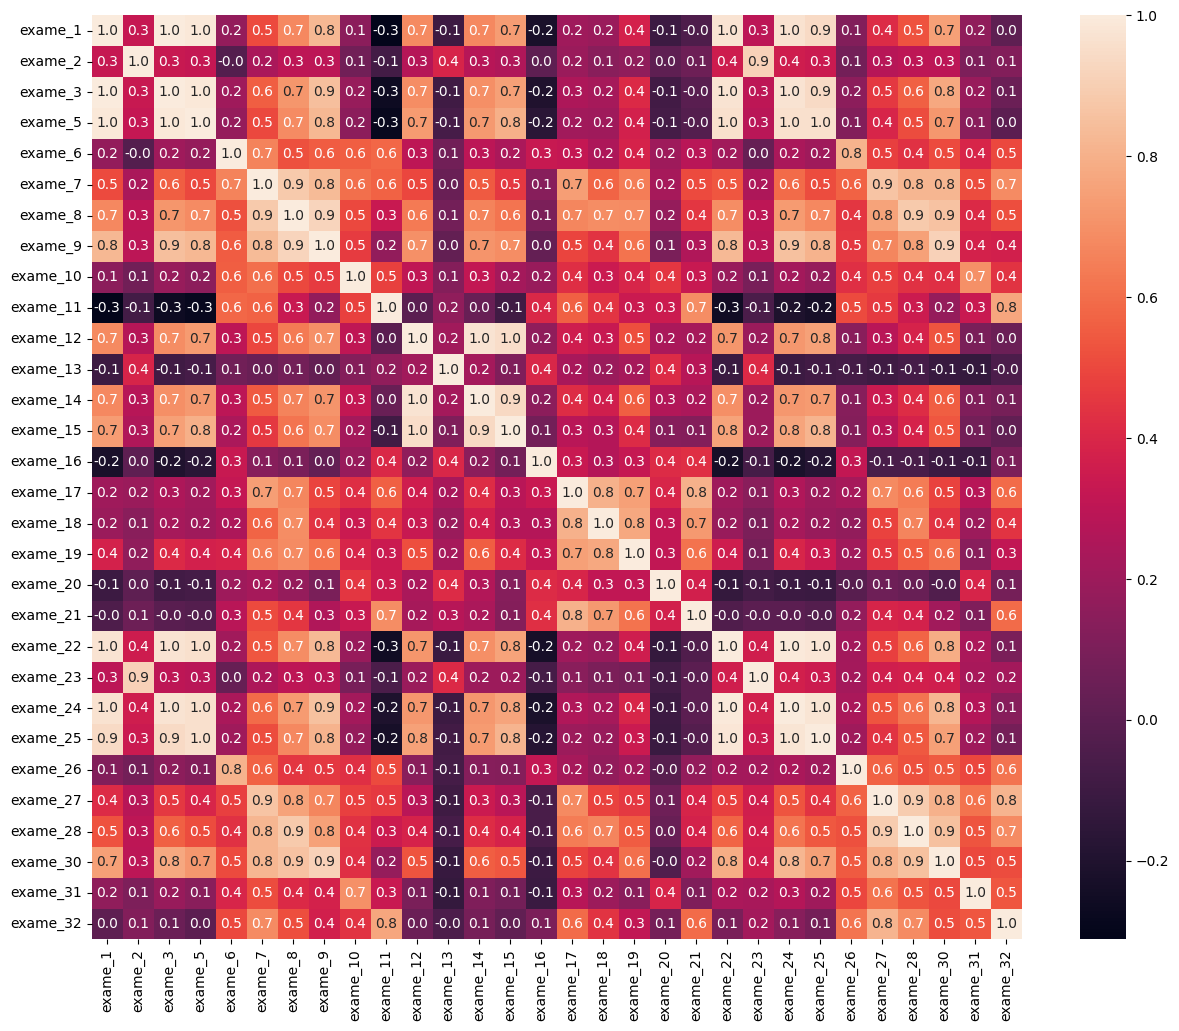

In [106]:
matriz_correlacao = exames_variaveis.corr()
plt.figure(figsize = (15,12))
sns.heatmap(matriz_correlacao, annot = True, fmt = '.1f')

Agora temos uma matriz de correlação mais agradável de ser visualizada. Na diagonal principal, temos valores em branco (1.0) que são totalmente correlacionados, afinal fazem a correspondência de uma *feature* com ela mesma. Sendo assim, não é muito do nosso interesse trabalhar com ela, mas sim com as outras *features* da matriz.

Por exemplo, é possível encontrar diversas *features* totalmente correlacionadas, com valores iguais a 1.0, e outras com um valor bem próximo, como 0.9. Enquanto isso, também temos *features* pouquíssimo correlacionadas, com valores próximos a 0.0. Por enquanto trabalharemos na remoção das *features* altamente correlacionadas.

## Alta correlacionalidade

Agora iremos analisar as variáveis de alta correlacionalidade. Para isso criaremos então uma `matriz_correlacao_v1` que armazenará o retorno de todos as correlações superiores a 0.99. Ou seja, que possuem uma correlação quase perfeita.

In [107]:
matriz_correlacao_v1 = matriz_correlacao[matriz_correlacao > 0.99]
matriz_correlacao_v1

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Agora temos uma matriz contendo somente os valores maiores que 0.99, enquanto todos os outros são representados por NaN. Observe que para todos os exames, existem pelo menos uma relação perfeita (1.0), que é justamente quando ele é comparado consigo mesmo. Portanto, se fizermos a soma dos valores de cada coluna obteremos os valores totais de correlações para cada exame.

In [108]:
matriz_correlacao_v1.sum()

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

Observe que os exames que estão com valor total da soma igual a 1, só possuem relações fortes consigo mesmo. Já os exames que possuem valores maiores que 1, são justamente os exames que possuem correlações fortes com outros exames.

Agora iremos salvar essa Series em uma variável para que possamos usa-la como parâmetro de seleção de dados. Estamos interessados apenas nos exames que possuem fortes correlações com outros exames.


In [109]:
soma_correlacoes = matriz_correlacao_v1.sum()
exames_correlacionados = soma_correlacoes[soma_correlacoes > 1]
exames_correlacionados

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

Pronto, agora temos uma Series apenas com os exames que estão fortemente correlacionados. Não é interessante para o aprendizado de maquina que deixemos esses exames na base de dados, pois como possuem fortes semelhanças entre si, acima de 0.99, se comportam como se fossem exames duplicados. Portanto, a fim de aprimorar nosso modelo, é recomendável que deixemos apenas um de cada.

Mas como saber qual devemos remover e qual devemos deixar? Primeiramente temos que identificar quais são suas relações. Se voltarmos para o mapa de calor que geramos anteriormente, veremos que o exame 1 possui forte relação com o 3 e o exame 22 com o 24. Logo, podemos escolher apenas um exame representante para cada par de semelhança. Para este caso, iremos escolher o 1 e o 22 como representantes, logo temos de remover o 3 e o 24 da nossa base de dados.

In [110]:
exames_variaveis = exames_variaveis.drop(columns=['exame_3','exame_24'])
exames_variaveis

,exame_1,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,...,exame_21,exame_22,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,1.097064,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,...,0.907083,1.886690,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,...,-0.099444,1.805927,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,...,0.293559,1.511870,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,...,2.047511,-0.281464,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,...,0.499328,1.298575,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,2.782080,...,0.167980,1.901185,0.117700,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,1.300499,...,-0.490556,1.536720,2.047399,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,0.184892,...,0.036727,0.561361,1.374854,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,1.157935,...,0.904057,1.961239,2.237926,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


Agora vamos testar o modelo com essa nova seleção de dados.

In [111]:
classificar(exames_variaveis)

Acurácia da classificação: 94.41%.


Agora tivemos uma acurácia de 94%, uma melhora de 1% em relação ao modelo anterior. Como já mencionamos anteriormente, toda melhora é bem vinda. E como já estamos próximos de 100% as melhoras serão sempre gradativas e pequenas.

## Correlação e Causalidade

Antes de continuarmos a trabalhar no nosso projeto, vamos conversar sobre um detalhe.

Temos que ter bastante cuidado ao analisarmos correlações, pois podemos tirar certas conclusões que às vezes não fazem muito sentido. Por exemplo, poderíamos ter concluído que, como "exame_1" e "exame_3" estão altamente correlacionados, o alto valor de "exame_3" é causado por "exame_1". Porém, a associação de correlação e causalidade nem sempre é verdadeira.

O site [Tyler Vigen](https://www.tylervigen.com/spurious-correlations) apresenta uma lista muito interessante de "correlações falaciosas" que podem nos ajudar a ilustrar esse ponto. Por exemplo, o número de pessoas que se afogaram em piscinas apresenta uma correlação relativamente alta (66%) com o número de filmes em que Nicolas Cage apareceu naquele ano. Outra correlação falaciosa apresentada é a taxa de divórcios em Maine, que parece diminuir na mesma taxa que o consumo de margarina por pessoa. Desta vez, temos uma correlação altíssima, de 99.26%.

Porém, embora estejam aparentemente correlacionadas, nenhuma dessas variáveis é causa uma da outra - se Nicolas Cage parar de fazer filmes, não morrerão menos pessoas afogadas, nem mais pessoas se divorciarão no Maine se o consumo de margarina aumentar.

Portanto, devemos tomar cuidado na análise dos dados para não tomarmos conclusões precipitadas.

# Automatizando a seleção

## SelectKBest

Agora que excluímos as *features* de alta correlação do nosso dataset, será que existe uma maneira de selecionarmos um determinado número (*k*) de melhores *features* desse conjunto? A ideia seria gerarmos uma pontuação para cada *feature* (cada exame) e selecionar as melhores dentre elas.

O SKlearn possui um método [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html) que faz justamente isso: a partir de uma função matemática, ele gera um score para cada feature e seleciona um determinado número de features dentre os melhores scores.

Para acionarmos a função, além do número *k* de features, precisaremos passar a função matemática que deverá ser utilizada. Uma função muito utilizada é o Qui-quadrado ([chi2](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html)), que usaremos para inferir quais features serão mais representativas para nosso processo de classificação.

In [112]:
from sklearn.feature_selection import SelectKBest, chi2

selecionar_kmelhores = SelectKBest(chi2, k=5)
selecionar_kmelhores

SelectKBest(k=5, score_func=<function chi2 at 0x7b67fe5f5360>)

Precisamos selecionar novamente nossos dados, entretanto a função `chi2` não aceita valores negativos. Vamos verificar se os nossos dados contêm valores negativos.

In [113]:
exames_variaveis.head()

,exame_1,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,...,exame_21,exame_22,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,1.097064,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,...,0.907083,1.886690,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,...,-0.099444,1.805927,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,...,0.293559,1.511870,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,...,2.047511,-0.281464,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,...,0.499328,1.298575,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


Como podemos ver, a nossa atual base de dados contêm valores negativos, porque eles foram normalizados. Então, precisamos pegar a versão do dataframe antes da normalização e remover as colunas que já foram removidas até aqui, sem normalizar os dados. Se voltarmos na seção 'padronizando os dados' no sumário, veremos que a versão do dataframe que estamos procurando é a `x`, portanto vamos trabalhar com ele.

Primeiramente, precisamos identificar quais colunas removemos até aqui.


In [114]:
colunas_a_remover = []

for c in list(x.columns):
  if c not in exames_variaveis.columns:
    colunas_a_remover.append(c)

colunas_a_remover

['exame_3', 'exame_4', 'exame_24', 'exame_29']

Agora vamos criar um novo dataframe sem essas colunas.

In [115]:
exames = x.drop(columns=colunas_a_remover)

Pronto, agora já podemos dividir nossos dados de treino e teste para o nosso modelo.

In [116]:
treino_x, teste_x, treino_y, teste_y = train_test_split(exames, diagnostico, test_size = 0.3)

selecionar_kmelhores.fit(treino_x, treino_y)
treino_kbest = selecionar_kmelhores.transform(treino_x)
teste_kbest = selecionar_kmelhores.transform(teste_x)

Pronto, agora temos as novas base de dados `treino_kbest` e `teste_kbest` que usam apenas os 5 melhores exames para treino e teste.

In [117]:
treino_kbest.shape

(398, 5)

In [118]:
teste_kbest.shape

(171, 5)

Vamos testar o modelo com essa nova seleção de dados.

In [119]:
SEED = 1234
random.seed(SEED)

classificador = RandomForestClassifier(n_estimators = 100)
classificador.fit(treino_kbest, treino_y)
print(f"Acurácia da classificação: {classificador.score(teste_kbest, teste_y)*100:.2f}%.")

Acurácia da classificação: 90.06%.


Observe que tivemos uma queda de 4% em relação aos resultados que já tinhamos obtido antes. Entretanto, estamos utilizando apenas 5 exames para fazer essa classificação. Portanto, caso a quantidade de exames seja um fator escasso, podemos selecionar apenas 5 exames para fazer uma classificação de tumor com uma acurácia de 90%! Com certeza isto é um fator econômico relevante que deve ser levado em consideração.

Se quisermos saber quais são esses 5 melhores exames, podemos utilizar a função `get_support(indices=True)` para revelar os índices das colunas.

In [120]:
exames_kbest = selecionar_kmelhores.get_support(indices=True)
exames_kbest

array([ 2, 11, 12, 19, 21])

Agora que temos os índices, podemos vizualizar as colunas do dataframe.

In [121]:
exames.iloc[:,exames_kbest].head(0)

,exame_5,exame_14,exame_15,exame_22,exame_25


Esses são os 5 melhores exames da nossa base de dados para classificar tumores como benignos ou malignos. Ou seja, são os melhores exames para diagnosticar câncer.

## RFE

Nessa nova técnica, por meio da acurácia, nosso classificador saberá qual das features é mais importante pra ele, descartando as de menor acurácia. Esse processo será feito sucessivamente até atingir o número de features selecionado - no nosso caso, 5. Esse modelo, que implementaremos em Python, é chamado de [RFE - Recursive Feature Elimination](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html), algo como "Eliminação de Feature por Recursão".

Nosso classificador é o RandomForestClassifier(), mas o nosso modelo atual está treinado com os dados gerados pelo SelectKBest. Como queremos testar esse novo selecionador de variáveis, precisamos dos dados integrais. Sendo assim, teremos que recriar o modelo, treina-lo novamente com os dados treino_x e treino_y.

In [122]:
# Recriando o modelo de classificação
SEED = 1234
random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(exames, diagnostico, test_size = 0.3)
classificador = RandomForestClassifier(n_estimators=100)
classificador.fit(treino_x, treino_y)

RandomForestClassifier()

Agora podemos criar nosso novo seletor de variáveis, o RFE.



In [123]:
from sklearn.feature_selection import RFE

selecionador_rfe = RFE(estimator = classificador, n_features_to_select = 5, step = 1)
selecionador_rfe.fit(treino_x, treino_y)
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)
classificador.fit(treino_rfe, treino_y)
print(f"Acurácia da classificação: {classificador.score(teste_rfe, teste_y)*100:.2f}%.")

Acurácia da classificação: 90.06%.


Curiosamente, obtemos o mesmo resultado de acurácia. Vamos agora verificar quais exames estão sendo usados como parâmetros.

In [124]:
exames_rfe = selecionador_rfe.get_support(indices=True)
exames.iloc[:,exames_rfe].head(0)

,exame_8,exame_9,exame_22,exame_25,exame_30


Permaneceram apenas 2 exames da seleção do SelecKBest, o **exame_22** e o **exame_25**, o que é bastante surpreendente. Isso evidência que esses exames realmente devem ter um grande fator de determinação, já que, apesar dos outros exames terem mudado, o percentual de acerto permaneceu o mesmo.

## RFECV

O [RFE Cross Validation (RFECV)](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html) divide o banco de dados em blocos e aplica o algoritmo RFE em cada um desses blocos, gerando diferentes resultados. Dessa forma, O RFECV não só nos informa quantas features precisamos ter para gerar o melhor resultado possível, como também quais features são essas.

Vamos testar esse seletor de variáveis.

In [125]:
# Recriando o modelo de classificação
SEED = 1
random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(exames, diagnostico, test_size = 0.3)
classificador = RandomForestClassifier(n_estimators=100)
classificador.fit(treino_x, treino_y)

RandomForestClassifier()

In [126]:
from sklearn.feature_selection import RFECV

selecionador_rfecv = RFECV(estimator = classificador, cv = 5, step = 1, scoring='accuracy')
selecionador_rfecv.fit(treino_x, treino_y)
treino_rfecv = selecionador_rfecv.transform(treino_x)
teste_rfecv = selecionador_rfecv.transform(teste_x)
classificador.fit(treino_rfecv, treino_y)
print(f"Acurácia da classificação: {classificador.score(teste_rfecv, teste_y)*100:.2f}%.")

Acurácia da classificação: 95.91%.


Agora obtemos supreendentes 95.91% de acurácia. Portanto, esse é o melhor modelo para seleção de variáveis.

Vamos verificar quantas variáveis (exames) ele selecionou para a predição de Machine Learning.

In [127]:
selecionador_rfecv.n_features_

9

Agora vamos ver quais exames são esses.

In [128]:
exames[exames.columns[selecionador_rfecv.support_]].head(0)

,exame_1,exame_5,exame_8,exame_9,exame_22,exame_23,exame_25,exame_28,exame_30


Mas por que o RFECV escolheu 9 exames? É possível plotarmos um gráfico que nos ajudará a entender essa escolha.

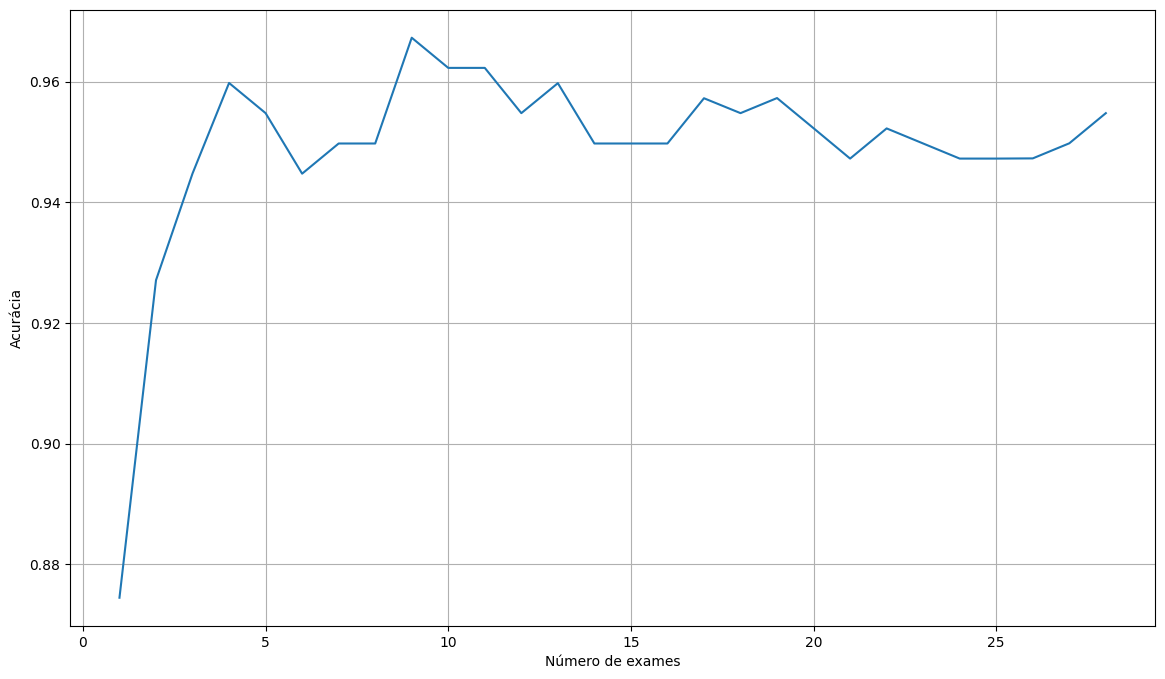

In [129]:
import matplotlib.pyplot as plt

plt.figure(figsize = (14,8))
plt.xlabel('Número de exames')
plt.ylabel('Acurácia')
plt.grid()
plt.plot(range(1, len(selecionador_rfecv.cv_results_['mean_test_score'])+1), selecionador_rfecv.cv_results_['mean_test_score'])
plt.show()

O gráfico mostra o percentual de acurácia em relação ao número de exames analisados. Observe que o ápice da curva do gráfico está justamente em um ponto proximo ao número 10 de exames, mas é um pouquinho antes, ou seja 9. Portanto, esse é o número de exames em que o algoritmo consegue obter a melhor combinação possível para gerar o melhor resultado de acurácia.

# Visualizando os dados

A seguir veremos duas formas de visualizarmos os dados que trabalhamos até agora em um plano, utilizando os métodos PCA e TSNE.

## PCA

Uma das técnicas que podemos utilizar para manter o máximo de informações possível em dimensionalidades reduzidas é o [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html). O PCA opera uma transformação matemática sobre os dados, na qual as primeiras dimensões serão as variáveis que manterão o maior volume possível de informação.

Para usarmos essa técnica, precisamos definir o número de componentes (dimensões) da matriz que queremos que fique na matriz final. Este número é definido no parâmetro `n_components` e iremos defini-lo como 2.

In [130]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

Agora precisamos treinar o nosso modelo com os dados. Sabemos que o PCA trabalha melhor com dados normalizados, então vamos usar o dataframe `exames_variaveis` que já estão com os dados tratados e normalizados.

In [131]:
exames_pca = pca.fit_transform(exames_variaveis)

In [132]:
exames_pca

array([[ 8.96150504,  1.20129074],
       [ 1.44812702, -3.54148886],
       [ 5.24751143, -1.46792043],
       ...,
       [ 0.87829285, -1.93369918],
       [10.0242535 ,  0.84654838],
       [-5.04091294, -0.5352433 ]])

In [133]:
exames_pca.shape

(569, 2)

Pronto, agora temos os dados reduzidos em apenas duas dimensões e podemos plotar um gráfico para vizualizar esses dados.

<Axes: >

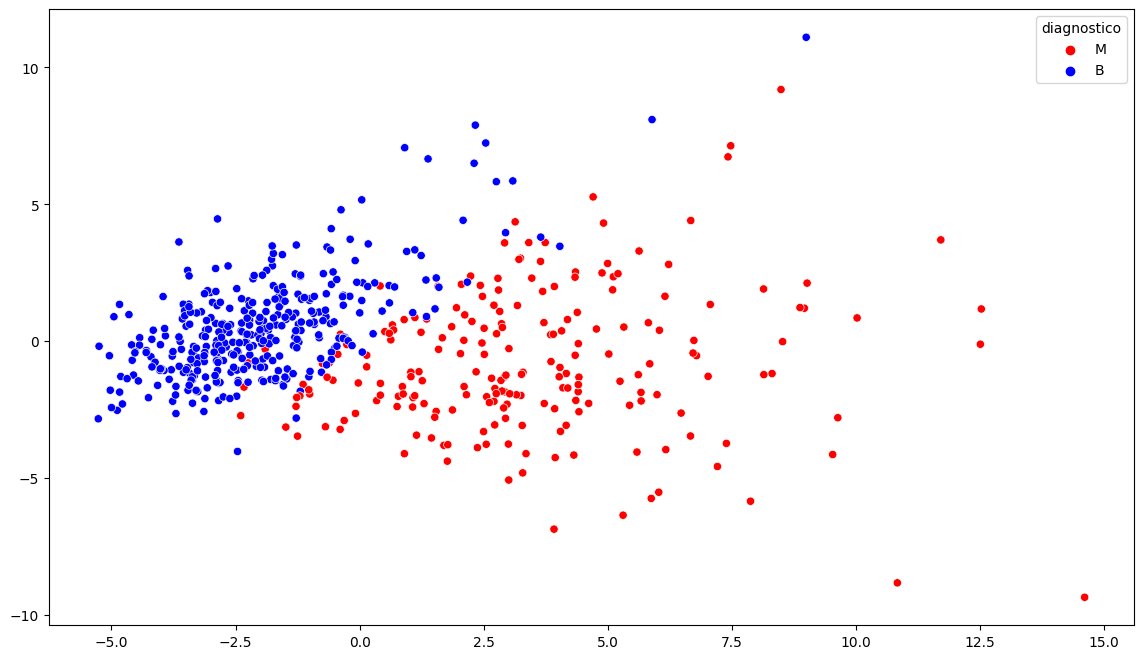

In [134]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x = exames_pca[:,0], y = exames_pca[:,1], hue = diagnostico, palette={'M': 'red', 'B': 'blue'})

Ao observar o gráfico, conseguimos visualizar uma região com maiores confusões de diagnóstico, mas se traçarmos uma linha reta nessa região veremos que ela divide a maior parte dos cânceres malignos e benignos.

O PCA é técnica boa para visualizar os padrões dos dados, mas existe uma melhor, que veremos a seguir.

## TSNE

De maneira resumida, a [TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html#sklearn.manifold.TSNE) é semelhante ao PCA, porém, ela tenta manter as distâncias entre os pontos.

Por exemplo, se calcularmos a distância entre quaisquer dois pontos na nossa base de dados, teremos um valor em 28 dimensões, que é justamente a quantidade de exames do nosso conjunto. O TSNE tenta manter a proporção dessas distâncias na redução para dimensões menores, permitindo que tenhamos uma noção de quão distante um ponto está do outro.

Então vamos testar esse modelo de visualização.

<Axes: >

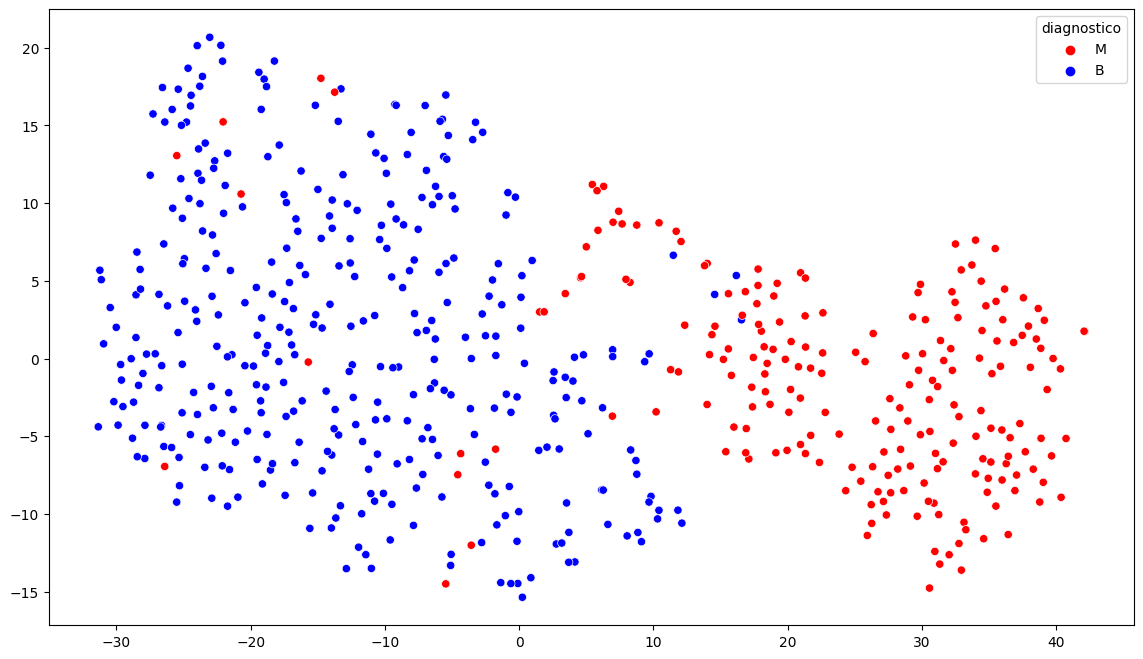

In [135]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2)
exames_tsne = tsne.fit_transform(exames_variaveis)
plt.figure(figsize=(14, 8))
sns.scatterplot(x = exames_tsne[:,0], y = exames_tsne[:,1], hue = diagnostico, palette={'M': 'red', 'B': 'blue'})

Como resultado, temos uma visualização que separa muito bem os dados no espaço, tornando mais claro quais pontos estão próximos de um tipo de câncer maligno ou benigno. Assim, é bem mais simples determinar uma fronteira entre tais classificações.

Essas técnicas que realizam uma transformação matemática nos dados antes de processá-los, reduzindo suas dimensões, são chamadas de "redução de dimensionalidade". A diferença entre a redução de dimensionalidade e a seleção de features é que a segunda funciona como um funil que filtra as principais características de uma base de dados original.